<a href="https://colab.research.google.com/github/asadrajpoot75/CPS5001/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

weeK #3
Data smoothing

Saving SMA.csv to SMA (9).csv
          DATE   OPEN   HIGH    LOW  CLOSE
0   01/02/1990  17.24  17.24  17.24  17.24
1   01/03/1990  18.19  18.19  18.19  18.19
2   01/04/1990  19.22  19.22  19.22  19.22
3   01/05/1990  20.11  20.11  20.11  20.11
4   01/08/1990  20.26  20.26  20.26  20.26
5   01/09/1990  22.20  22.20  22.20  22.20
6   01/10/1990  22.44  22.44  22.44  22.44
7   01/11/1990  20.05  20.05  20.05  20.05
8   01/12/1990  24.64  24.64  24.64  24.64
9   01/15/1990  26.34  26.34  26.34  26.34
10  01/16/1990  24.18  24.18  24.18  24.18
11  01/17/1990  24.16  24.16  24.16  24.16
12  01/18/1990  24.34  24.34  24.34  24.34
13  01/19/1990  22.50  22.50  22.50  22.50
14  01/22/1990  26.70  26.70  26.70  26.70
15  01/23/1990  24.72  24.72  24.72  24.72
16  01/24/1990  25.39  25.39  25.39  25.39
17  01/25/1990  25.63  25.63  25.63  25.63
18  01/26/1990  26.28  26.28  26.28  26.28
19  01/29/1990  26.44  26.44  26.44  26.44


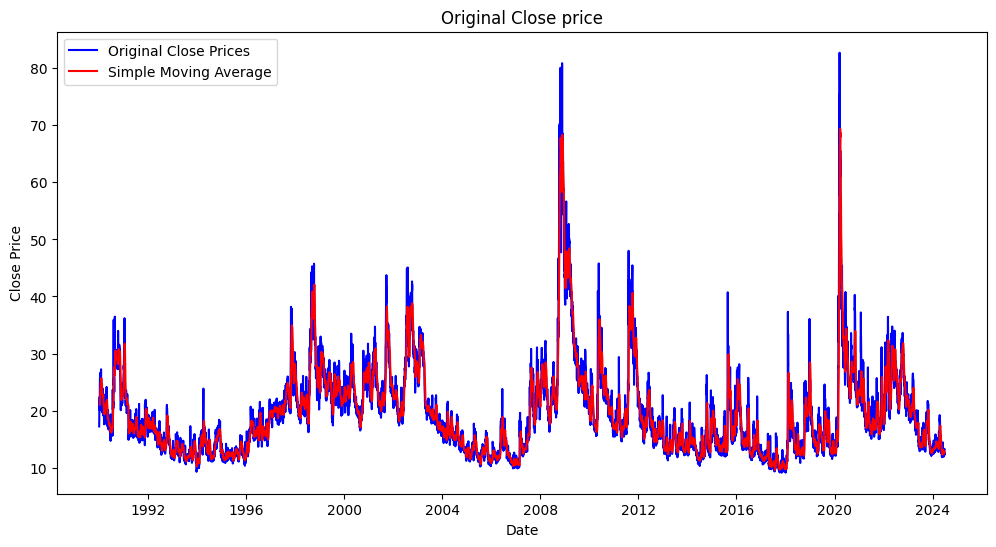

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('SMA.csv')

print(data.head(20))

data['DATE']=pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

closing_prices = data['CLOSE']

window_size = 10

sma = closing_prices.rolling(window=window_size).mean()

plt.figure(figsize=(12,6))
plt.plot(closing_prices, label='Original Close Prices', color='blue')
plt.plot(sma, label='Simple Moving Average', color='red')
plt.title('Original Close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



lowess class activity

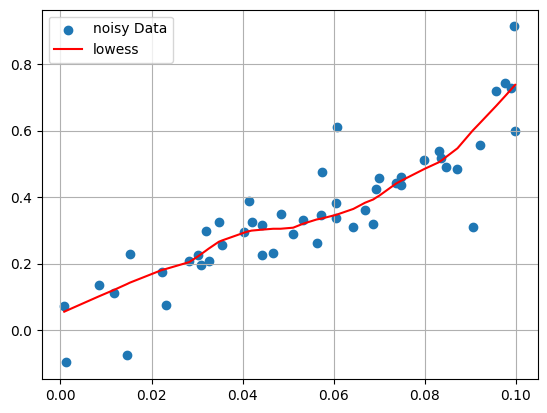

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

x = np.sort(np.random.uniform(0,0.1,50))

amplitude = 1.0
frequency = 1.0
noise_std = 0.1

y = amplitude * np.sin(2 * np.pi * frequency * x) + np.random.normal(0,noise_std,len(x))

lowess = sm.nonparametric.lowess(y,x,frac=0.3)

plt.scatter(x,y, label='noisy Data')
plt.plot(lowess[:,0], lowess[:,1], color='red', label='lowess')
plt.grid(True)
plt.legend()
plt.show()


Data normalization

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from google.colab import files
uploaded = files.upload()

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('diabetes-data.csv')

print('Original dataset')
print(df[columns].head(10))

#df_norm = round((df - df.min()) / (df.max() - df.min()),3)

scaler = MinMaxScaler()
df_norm = round(pd.DataFrame(scaler.fit_transform(df), columns=df.columns),3)
df_norm = pd.DataFrame(df_norm, columns=columns)

print('\nNormalized dataset:')
print(df_norm.head(10))


Saving diabetes-data.csv to diabetes-data (3).csv
Original dataset
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2       

Z-score Normalization

In [26]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Z-score.csv')

df = pd.DataFrame(data)

print('Original dataset')
print(df)

mean_price = df['price'].mean()
mean_Bedrooms = df['Number'].mean()
mean_size = df['Size'].mean()

std_price = df['price'].std()
std_Bedrooms = df['Number'].std()
std_size = df['Size'].std()

Zscore_price = round(((df['price'] - mean_price) / std_price),2)
Zscore_bedrooms = round(((df['Number'] - mean_Bedrooms) / std_Bedrooms),2)
Zscore_size = round(((df['Size'] - mean_size) / std_size),2)

data_normalised = {
    'price': Zscore_price,
    'Number': Zscore_bedrooms,
    'Size': Zscore_size
}
df_normalised=pd.DataFrame(data_normalised)

print('\nNormalized dataset')
print(df_normalised)

Saving Z-score.csv to Z-score (3).csv
Original dataset
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0         

KeyError: 'price'